In [1]:
from SPV_utils import *

../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_1.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_2.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_3.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_4.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_5.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_6.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_7.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_8.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_9.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_10.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_11.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_12.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_13.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_14.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_15.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_16.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_17.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_18.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_19.npy
..

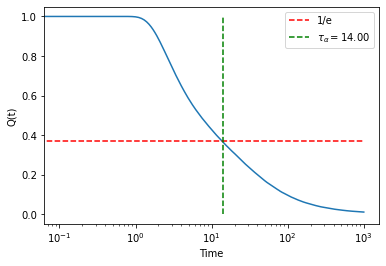

In [ ]:
# Ns = [100, 144, 196, 256, 324, 400, 625, 1444]
# disps = get_all_data_npy(rf"Data_small_v0\Data\coordinate_p0=3.80_v0={v0}_pin=0_set_", False)
# disps = get_all_data_npy(rf"Different_v0_Ens=100/Pin=0/Data/coordinate_p0=3.80_v0={v0}_pin=0_set_", False)
T_alpha_results = {}
S4s_all = {}

for N in [10000]:
    # disps = get_all_data(rf"100_Ensemble\N={N}_pin=0\N={N}\coordinate_p0=3.80_v0=0.50_pin=0_set_", False, 10)
    disps = get_all_data_npy(rf"../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_", False, 100)
    Q_t_avg = np.zeros(len(disps[1][0]), dtype=np.complex128)
    for i in disps.keys():
        timestamps, arrs, N = disps[i]
        Q_t_avg +=Q_t(arrs, arrs[0])
    Q_t_avg /= len(disps.keys())
    T_alpha_ind = np.where(np.abs(Q_t_avg) < 1/np.e)[0][0]
    T_alpha = timestamps[T_alpha_ind]
    
    T_alpha_results[N] = T_alpha_ind

    print(T_alpha_ind, T_alpha)

    plt.plot(timestamps, np.abs(Q_t_avg))
    plt.xscale('log')
    plt.xlabel("Time")
    plt.ylabel("Q(t)")
    plt.hlines(1/np.e, colors='r', linestyles='dashed', label = '1/e', xmin = timestamps[0], xmax = timestamps[-1])
    plt.vlines(T_alpha, ymin=0, ymax=1, colors='g', linestyles='dashed', label = r"$\tau_{\alpha} = $" + f"{T_alpha:.2f}")
    plt.legend()

    plt.show()
    
    S4s = {}    
    for q in np.arange(0, 1, 0.005):
        # print(q)
        t = T_alpha_ind
        disps_T = {}
        for i in disps.keys():
            disps_T[i] = (disps[i][0][t:t+1], disps[i][1][t:t+1, :, :], disps[i][2])
        S4s[q] = S4(q, disps_T)
    S4s_all[N] = S4s    


    for q in S4s.keys():
        plt.plot(q, np.abs(S4s[q]), 'o', c = 'b')
    plt.xlabel("q")
    plt.ylabel(r"$S_4(q,\tau_{\alpha})$")
    plt.show()
    
    
    for q in S4s.keys():
        plt.plot(q**2, 1/np.abs(S4s[q]), 'o', c = 'b')
    plt.xlabel(r"$q^2$")
    plt.ylabel(r"$1/S_4(q,\tau_{\alpha})$")
    plt.show()


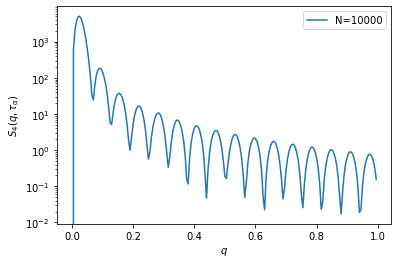

In [22]:
for N in S4s_all.keys():
    S4s = S4s_all[N]
    qs = np.array(list(S4s.keys()))
    S4_q_alpha = np.array([np.abs(S4s[q]) for q in qs])
    plt.plot(qs, S4_q_alpha,  label = f"N={N}")
plt.xlabel(r"$q$")
plt.ylabel(r"$S_4(q,\tau_{\alpha})$")
plt.yscale('log')
plt.legend()
plt.show()

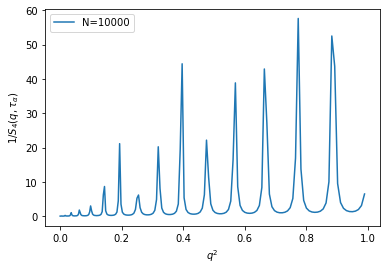

In [39]:
w = 1
for N in S4s_all.keys():
    S4s = S4s_all[N]
    qs = np.array(list(S4s.keys()))
    S4_q_alpha = np.array([np.abs(S4s[q]) for q in qs])[:,0] + 0.0001
    S4_q_alpha = np.convolve(S4_q_alpha, np.ones(w)/w, 'same')
    mask1 = qs>0.01
    mask3 = qs<1
    mask2 = (1/S4_q_alpha) < 10000
    mask = np.logical_and (np.logical_and(mask1 , mask2), mask3)
    x = (qs**2)[mask]
    y = 1/S4_q_alpha[mask]
    plt.plot(x, y, label = f"N={N}")
plt.xlabel(r"$q^2$")
plt.ylabel(r"$1/S_4(q,\tau_{\alpha})$")
# plt.yscale('log')
plt.legend()
plt.show()

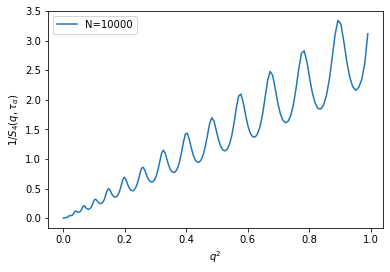

In [38]:
w = 10
for N in S4s_all.keys():
    S4s = S4s_all[N]
    qs = np.array(list(S4s.keys()))
    S4_q_alpha = np.array([np.abs(S4s[q]) for q in qs])[:,0] + 0.0001
    S4_q_alpha = np.convolve(S4_q_alpha, np.ones(w)/w, 'same')
    mask1 = qs>0.01
    mask3 = qs<1
    mask2 = (1/S4_q_alpha) < 10000
    mask = np.logical_and (np.logical_and(mask1 , mask2), mask3)
    x = (qs**2)[mask]
    y = 1/S4_q_alpha[mask]
    plt.plot(x, y, label = f"N={N}")
plt.xlabel(r"$q^2$")
plt.ylabel(r"$1/S_4(q,\tau_{\alpha})$")
# plt.yscale('log')
plt.legend()
plt.show()